<a href="https://colab.research.google.com/github/Rogerio-mack/MDJ/blob/main/EADMDJ_A8_ModelosNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"> EAD <b>Mineração de Dados para Jogos </b> </font></h1>

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">A8 Modelos Neurais e Deeplearning</font></h1>
<hr>

# **IMPORTANTE:** Antes de começar 

Execute a célula LAB SET UP antes da seção de exercícios. Ela irá **inicializar** o seu ambiente com rotinas que são empregadas aqui.

## Neurônio simples
 
Um neurônio artificial nada mais é do que um artefato de software que faz uma combinação linear das entradas e aplica um função de ativação como a função $sign$, $tanh$ ou $relu$ para produzir uma saída.

$$ f(X) = sign( w_0 + w_1 x_1 + ... + w_n x_n ) $$

O treinamento do neurônio é feito ajustando-se os pesos $w_n$ de acordo com o erro de predição obtido para se estimar a saída $f(X) \cong y$.

$$ \min_{W} \sum || f(X)- y || $$


## Treinando a função **OR**

O código abaixo mostra o treinamento da função **OR** com um único neurônio com função de ativação $sign$ (função sinal).

Função $OR(X) \rightarrow y$:

```
  X     y
 0 0    0
 0 1    1
 1 0    1
 1 0    1
```

[[-1. -1. -1.  1.]]
[[-1. -1.  0.  1.]]
[[-1.  0.  0.  1.]]
[[-1.  1.  1.  1.]]


Text(0.5, 1.0, 'Training Error')

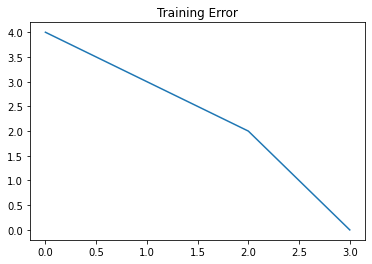

In [ ]:
X = np.matrix([ [0,0], [1,0], [0,1], [1,1] ])
y = np.matrix( [-1, 1, 1, 1] )

error = []
W1 = np.matrix([ [0.4,0.4] ])               # initial Weigths
W0 = -0.5
y_pred = np.sign( W1*X.T + W0 )
print(y_pred)
error.append(np.abs( (y_pred - y).sum() ))

W1 = np.matrix([ [0.4,0.5] ])
W0 = -0.5
y_pred = np.sign( W1*X.T + W0 )
print(y_pred)
error.append(np.abs( (y_pred - y).sum() ))

W1 = np.matrix([ [0.5,0.5] ])
W0 = -0.5
y_pred = np.sign( W1*X.T + W0 )
print(y_pred)
error.append(np.abs( (y_pred - y).sum() ))

W1 = np.matrix([ [0.5,0.5] ])
W0 = -0.4
y_pred = np.sign( W1*X.T + W0 )
print(y_pred)
error.append(np.abs( (y_pred - y).sum() ))

sns.lineplot(range(4),error)
plt.title('Training Error')

## Redes neurais 
 
Um único neurônio entretanto tem uma capacidade limitada de aprendizado. Por exemplo, ele não consegue aprender a função **XOR**.


Função $XOR(X) \rightarrow y$:

```
  X     y
 0 0    0
 0 1    1
 1 0    1
 1 0    0
```

Pois um único neurônio somente tem capacidade para fazer a separação de conjuntos linearmente separáveis.

Para resolver essa limitação podemos então trabalhar com múltiplos neurônios em camadas. As saídas dos neurônios de uma camada são então empregadas como entradas para a camada seguinte. As camadas entre a camada inicial de neurônios (de entrada) e a camada final (de saída) constitui as camadas ocultas da rede.

O treinamento da rede segue o mesmo princípio, embora mais complexo, ajustando os pesos $w_n$ de acordo com o erro de predição obtido para se estimar a saída $f(X) \cong y$.

$$ \min_{W} \sum || f(X)- y || $$

Chamamos esse aprendizado de *backpropagation* ou *retropropagação*.

Acesse agora http://playground.tensorflow.org/ para uma demonstração.

## **Case**: Detecção de Fraude em Operações de Cartão de Crédito

http://meusite.mackenzie.br/rogerio/ML/The-InfoQ-eMag-Introduction-to-Machine-Learning.pdf

Esse artigo trás uma ótima introdução ao Aprendizado de Máquina. O artigo demonstra a aplicação de dois modelos de classificação,**Árvores de Decisão e Regressão Logística**, para um conjunto de dado simples para detecção de fraude em operações de cartões de crédito. 

Aqui você vai empregar o mesmo conjunto de dados para um aprendizado de Deep Learning com **TensorFlow+Keras**. 

URL: https://meusite.mackenzie.br/rogerio/ML/qconlondon2016_sample_data.csv

**IMPORTANTE** 
O uso de deeplearning pode ser bastante complexo e exigiria um bom tempo para estarmos aptos a empregar suas funções em diferentes problemas. Entenda esse exemplo como uma *degustação* do deep learning apenas para que você possa fixar os conceitos dessa técnica.

## Explorando os dados


In [ ]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

In [ ]:
fraud = pd.read_csv("https://meusite.mackenzie.br/rogerio/ML/qconlondon2016_sample_data.csv")
fraud.drop(columns=['charge_time'],inplace=True) # por simplicidade excluímos esse dado do treinamento
                     
print(fraud.head())
print(fraud.shape) 



   fraudulent  amount card_country  card_use_24h
0       False   20484           US             0
1       False    1211           US             0
2       False    8396           US             1
3       False    2359           US             0
4       False    1480           US             3
(89393, 4)


## Preparando os dados `X` e `y`

A preparação dos dados pode ser bastante complexa. Aqui ela envolve o **hot encode** dos atributos não numéricos, o rescaling dos dados e ainda a formatação dos dados para os padrões do **TensorFlow/Keras** (formato de matrizes e não dataframes).

**Preparando a entrada `X` (hot encode, Scaler).**

In [ ]:
X = fraud.drop(columns=['fraudulent'])
    
X_number = X.select_dtypes(include='number')
X_categorical = X.select_dtypes(exclude='number')
    
dummies = [pd.get_dummies(X[c],prefix=c, prefix_sep='_') for c in X_categorical.columns]
X = pd.concat(dummies, axis=1)
    
frames = [X_number,X]
X = pd.concat(frames, axis=1)
X.iloc[0]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_matrix = scaler.transform(X)
temp = X.index
X = pd.DataFrame(X_matrix,columns=X.columns)
X.index = temp
X.describe()


,amount,card_use_24h,card_country_AU,card_country_GB,card_country_US
count,8.939300e+04,8.939300e+04,8.939300e+04,8.939300e+04,8.939300e+04
mean,3.053817e-16,-1.729873e-14,-9.032136e-18,4.297227e-14,-9.967645e-14
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.372910e-01,-1.729671e-01,-1.567963e-01,-1.782893e-01,-4.152974e+00
25%,-1.981673e-01,-1.729671e-01,-1.567963e-01,-1.782893e-01,2.407913e-01
50%,-1.619712e-01,-1.280861e-01,-1.567963e-01,-1.782893e-01,2.407913e-01
75%,-7.765084e-02,-3.832406e-02,-1.567963e-01,-1.782893e-01,2.407913e-01
max,1.153412e+02,3.869400e+01,6.377700e+00,5.608862e+00,2.407913e-01


**Preparando a saída `y`**

Valores numéricos para a saída de rede.

In [ ]:
fraud.fraudulent = fraud.fraudulent.replace(True,1)
fraud.fraudulent = fraud.fraudulent.replace(False,0)

y = fraud.fraudulent

## Separando os dados de Treinamento e Teste

In [ ]:
seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)


## Adequando os dados para o `Keras`

Os dados são reformatados em matrizes e a saída em uma matriz binária.

In [ ]:
Xm = X_train
Xm = np.matrix(Xm)

ym = y_train
ym = np.transpose(np.matrix(ym))

from keras.utils import to_categorical
y_binary = to_categorical(ym)


## Configuração e Treinamento da Rede DeepLearning

Nossa rede terá 5 neurônios de entrada, correspondendo a cada atributo de entrada, duas camadas ocultas de 8 neurônios, e uma camada de saída com 2 neurônios correspondendo às duas classes de saída.

```
model = Sequential([layers.Dense(Xm.shape[1], activation='sigmoid', input_shape=[Xm.shape[1],])]) 

model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
```



In [ ]:
all_results = [] 

# Definição

model = Sequential([layers.Dense(Xm.shape[1], activation='sigmoid', input_shape=[Xm.shape[1],])]) 

model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
history = model.fit(Xm, y_binary, validation_split=0.2, epochs=100)


Train on 50060 samples, validate on 12515 samples
Epoch 1/100
50060/50060 [==============================] - 2s 46us/step - loss: 0.6898 - accuracy: 0.5622 - val_loss: 0.6691 - val_accuracy: 0.6280
Epoch 2/100
50060/50060 [==============================] - 2s 44us/step - loss: 0.6344 - accuracy: 0.6541 - val_loss: 0.6156 - val_accuracy: 0.6712
Epoch 3/100
50060/50060 [==============================] - 2s 43us/step - loss: 0.6118 - accuracy: 0.6714 - val_loss: 0.6109 - val_accuracy: 0.6741
Epoch 4/100
50060/50060 [==============================] - 2s 44us/step - loss: 0.6095 - accuracy: 0.6717 - val_loss: 0.6111 - val_accuracy: 0.6678
Epoch 5/100
50060/50060 [==============================] - 2s 43us/step - loss: 0.6088 - accuracy: 0.6720 - val_loss: 0.6094 - val_accuracy: 0.6731
Epoch 6/100
50060/50060 [==============================] - 2s 44us/step - loss: 0.6083 - accuracy: 0.6723 - val_loss: 0.6095 - val_accuracy: 0.6718
Epoch 7/100
50060/50060 [==============================] - 2s 

O Treinamento busca a cada etapa minimizar o erro (aumentar a acuracidade). Isso entretanto não ocorre de maneira regular. 

O Treinamento pode ser concluído quando se chega a uma determinado erro desejado ou após um certo número de iterações, uma vez que o modelo pode não convergir.

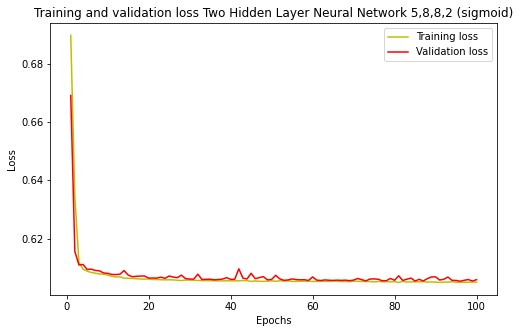

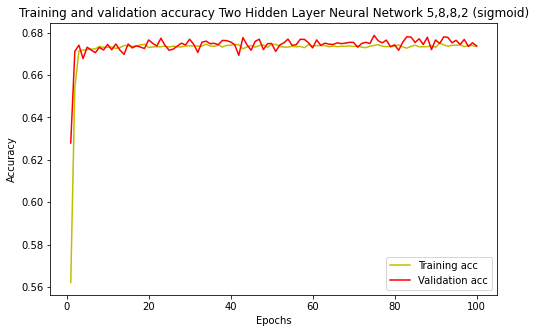

Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)Accuracy Train: 67.35 %, Accuracy Test: 67.38 %


In [ ]:
loss, val_loss, acc, val_acc = plot_loss_acc(history,'Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)')


Em cada neurônio de saída a rede retorna a probabilidade da classe. A seleção do neurônio de maior valor a classe mais provável (`np.argmax()`).

In [ ]:
# Predict

# Transforma as entradas em matriz para o Keras
Xm = X_test 
Xm = np.matrix(Xm)

# Predição
y_pred = np.argmax(model.predict(Xm), axis=-1)
    
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[10548  5903]
 [ 3004  7363]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70     16451
           1       0.56      0.71      0.62     10367

    accuracy                           0.67     26818
   macro avg       0.67      0.68      0.66     26818
weighted avg       0.69      0.67      0.67     26818



## **LAB SET UP**
Execute antes de iniciar o Lab.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

print('T12 Set Up completed!')    

T12 Set Up completed!


# Exercício. **CASE**: German Credit Risk

Neste exercício, empregue o dataset de Risco de Crédito abaixo e implemente um modelo de classificação classificação do risco de crédito empregando redes deep learning (*Tensorflow*) e redes neurais do *scikit-learn*. Opte pelas transformações que julgar necessárias que julgar necessárias. Ao final compare e discuta os modelos e resultados obtidos. 

Em resumo:

1. Explore os dados
2. Faça as transformações que julgar necessárias. Discuta e justifique as transformações.
3. Implemente um modelo de deeplearing para classificação do risco de crédito empregando o `TensorFlow`. 
4. Implemente a mesma tarefa com um modelo neural do `scikit-learn`.
5. Compare e discuta os resultados. 



## Obter os dados

Empregue `read_csv` para arquivos `.csv`.

In [ ]:
import pandas as pd
credit = pd.read_excel('https://meusite.mackenzie.br/rogerio/german_credit_data.xlsx')
credit.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
